In [1]:
pip install torch matplotlib scikit-learn

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
import torch
import matplotlib.pyplot as plt


In [3]:
def create_dataset(n_data : int = 100, a: float = -1.0, b: float = 5.0, scale : int = 15) -> torch.Tensor:
   # Generate random data as inputs
   x = torch.rand(n_data, 1) * scale # n_data=100 random numbers scaled between 0 and scale

    # Calculate corresponding y values

   y = a * x + b

   return x - torch.mean(x), y - torch.mean(y)

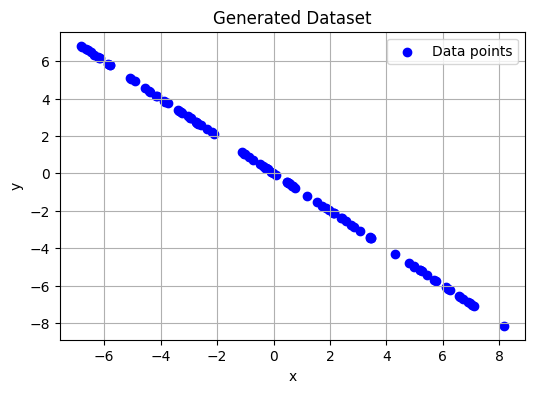

In [4]:
x, y = create_dataset()

# Plotting the data
plt.figure(figsize=(6, 4))
plt.scatter(x.numpy(), y.numpy(), color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def create_dataset(n_data:int = 100, a:float = -1.0, b:float = 5, scale:int = 15) -> torch.tensor:
    # Generate random data as inputs
    x = torch.rand(n_data, 1) * scale  # n_data=100 random numbers scaled between 0 and scale

    # Calculate corresponding y values
    y = a * x + b

    # Add some noise
    noise = torch.randn(y.shape) * 2  # Gaussian noise with standard deviation of 2
    y = y + noise

    # We center the data by using the mean of all values
    return x - torch.mean(x), y - torch.mean(y)

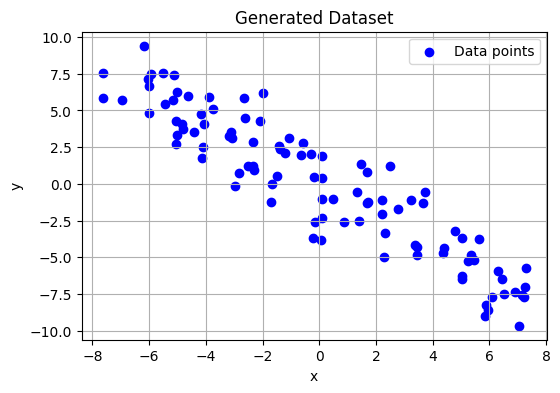

In [6]:
x, y = create_dataset()

# Plotting the data
plt.figure(figsize=(6, 4))
plt.scatter(x.numpy(), y.numpy(), color='blue', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Dataset')
plt.legend()
plt.grid(True)
plt.show()

Creating a Linear Neural Network

In [7]:
# y = W^ta + b_w  where W is the weights matrix and b is the bias

In [8]:
class Net(torch.nn.Module):
    """
    A simple 1 layer neural network with no activations
    """

    def __init__(self, n_feature:int, n_output:int):
        super(Net, self).__init__()

        # Create a linear layer
        self.hidden = torch.nn.Linear(n_feature, n_output)

    def forward(self, x:torch.tensor):
        # Use the linear layer
        x = self.hidden(x)

        return x

n_feature: The number of input features.
n_output: The number of output features.
Creates a linear layer (a fully connected layer) that transforms the input from n_feature dimensions to n_output dimensions.

In [9]:
# We define the network
net = Net(n_feature=1, n_output=1)

In [10]:
# Instantiate an SGD Optimizer that will work on our network's parameters (weights) with a learning rate of 0.005
optimizer = torch.optim.SGD(net.parameters(), lr=0.005)

# Instantiate the MSE Loss
loss_func = torch.nn.MSELoss()

In [11]:
# We simply call the function we made in the previous chapter
# It'll generate our linear looking dataset
x, y = create_dataset()
num_steps = 500
for t in range(num_steps):
    # Compute predictions from our training set `X_train`
    prediction = net(x)

    # The inputs to the loss function are:
    # 1. Our model's current predictions
    # 2. the target outputs y_train
    loss = loss_func(prediction, y)

    # We need to clear the gradients from the previous iteration
    # because PyTorch stores them in case we need them.
    # In our case we don't need to remember what happened the previous step
    optimizer.zero_grad()
    # We compute backpropagation to get the gradients
    loss.backward()
    # We do one iteration of SGD
    optimizer.step()
    if t % 100 == 0:
        print(f'Step [{t}/{num_steps}], Loss: {loss.item():.4f}')

Step [0/500], Loss: 51.5129
Step [100/500], Loss: 3.9895
Step [200/500], Loss: 3.8784
Step [300/500], Loss: 3.8635
Step [400/500], Loss: 3.8615


In [12]:
def create_dataset(n_data:int = 100, a:float = 2, b:float=0.2) -> torch.tensor:
    # We create n_data evenly spaces points from -1 to 1
    # x from -1 to 1 to get the full curvy shape of the power function
    x = torch.unsqueeze(torch.linspace(-1, 1, n_data), dim=1)

    # Pow function with added noise
    y = x.pow(a) + b * torch.rand(x.size())

    # Center the data
    return x - torch.mean(x), y - torch.mean(y)

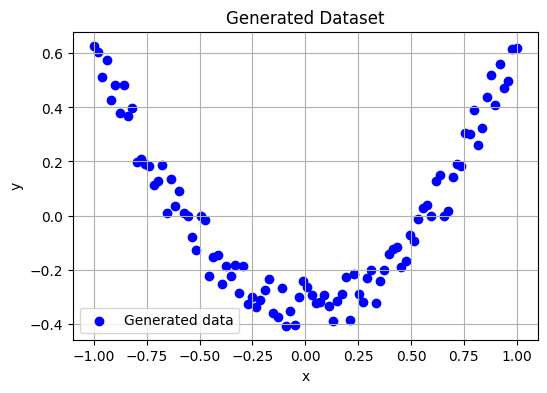

In [14]:
# Generate the dataset
x, y = create_dataset()

# Plot the dataset
plt.figure(figsize=(6, 4))
plt.scatter(x.numpy(), y.numpy(), color='blue', label='Generated data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        # We add a hidden layer
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        # output layer
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        # We add a non-linear activation function at the output of our new hidden layer
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)

Plot the training loss over time, as done in the provided code. If the loss is still decreasing steadily, you may need more training steps. If the loss plateaus or starts to increase, it might indicate that the model has converged or is overfitting.
Early stopping can be employed to stop training once the validation loss stops improving.
Validation Set:

Use a validation set to monitor the model's performance on unseen data. This can help determine if the model is overfitting or underfitting. If the validation loss starts increasing while the training loss decreases, it suggests overfitting.
Learning Rate
Learning Rate Schedules:

Start with a higher learning rate and gradually reduce it during training. Learning rate schedules (e.g., StepLR, ExponentialLR in PyTorch) can help in finding a suitable learning rate.

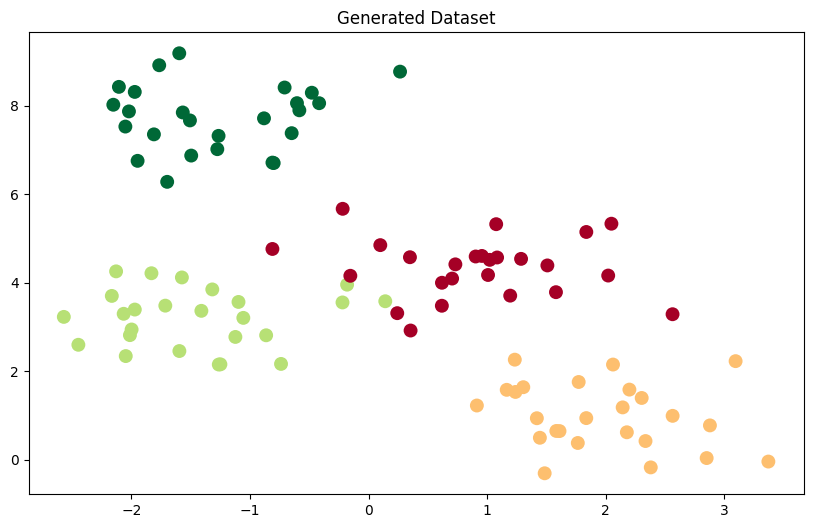

Step [0/9000], Loss: 1.6247
Step [500/9000], Loss: 0.4437
Step [1000/9000], Loss: 0.3109
Step [1500/9000], Loss: 0.2612
Step [2000/9000], Loss: 0.2298
Step [2500/9000], Loss: 0.2058
Step [3000/9000], Loss: 0.1861
Step [3500/9000], Loss: 0.1695
Step [4000/9000], Loss: 0.1554
Step [4500/9000], Loss: 0.1435
Step [5000/9000], Loss: 0.1335
Step [5500/9000], Loss: 0.1248
Step [6000/9000], Loss: 0.1174
Step [6500/9000], Loss: 0.1108
Step [7000/9000], Loss: 0.1050
Step [7500/9000], Loss: 0.1001
Step [8000/9000], Loss: 0.0958
Step [8500/9000], Loss: 0.0921
Accuracy: 97.00%


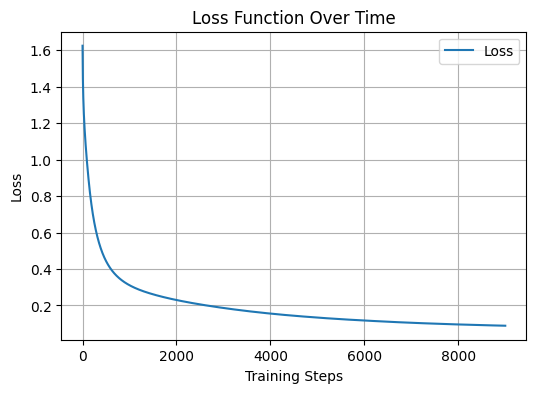

In [34]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Define the dataset creation function
def create_dataset(n_samples=200, n_features=2, n_classes=2, cluster_std=0.7):
    X, y = make_blobs(n_samples=n_samples, cluster_std=cluster_std, centers=n_classes, n_features=n_features, random_state=0)
    return torch.from_numpy(X).float(), torch.from_numpy(y).long()

# Define the Net class with a hidden layer
class Net(nn.Module):
    def __init__(self, n_feature: int, n_hidden: int, n_output: int):
        super(Net, self).__init__()
        self.hidden = nn.Linear(n_feature, n_hidden)
        self.out = nn.Linear(n_hidden, n_output)

    def forward(self, x: torch.Tensor):
        x = torch.relu(self.hidden(x))
        x = self.out(x)
        return x

# Parameters
n_samples = 100
n_features = 2
n_classes = 4

# Generate the dataset
x, y = create_dataset(n_samples=n_samples, n_features=n_features, n_classes=n_classes)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.title('Generated Dataset')
plt.show()

# Instantiate the model, loss function, and optimizer
net = Net(n_feature=n_features, n_hidden=10, n_output=n_classes)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# Number of training steps
num_steps = 9000

# List to store loss values for plotting
loss_values = []

# Training loop
for t in range(num_steps):
    # Compute predictions from our training set `x`
    prediction = net(x)

    # Calculate the loss
    loss = loss_func(prediction, y)

    # Store the loss value
    loss_values.append(loss.item())

    # Clear the gradients from the previous iteration
    optimizer.zero_grad()
    # Compute backpropagation to get the gradients
    loss.backward()
    # Perform one iteration of SGD
    optimizer.step()

    if t % 500 == 0:
        print(f'Step [{t}/{num_steps}], Loss: {loss.item():.4f}')

# Compute accuracy
def compute_accuracy(model, x, y):
    model.eval()
    with torch.no_grad():
        prediction = model(x)
        predicted_labels = torch.argmax(prediction, dim=1)
        accuracy = (predicted_labels == y).sum().item() / len(y)
    return accuracy

accuracy = compute_accuracy(net, x, y)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plotting the loss function over time
plt.figure(figsize=(6, 4))
plt.plot(range(num_steps), loss_values, label='Loss')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Loss Function Over Time')
plt.legend()
plt.grid(True)
plt.show()


 Evaluate the Model by Compute Accuracy, 3D Loss Landscape,Confusion Matrix

The accuracy of 97% indicates that the model is correctly classifying the majority of the samples.

In [35]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Function to compute loss for given parameter values
def compute_loss_for_params(param1_range, param2_range, param1_idx, param2_idx):
    loss_landscape = np.zeros((len(param1_range), len(param2_range)))

    original_params = [p.clone() for p in net.parameters()]

    for i, param1_value in enumerate(param1_range):
        for j, param2_value in enumerate(param2_range):
            # Update the model parameters
            net.parameters()[param1_idx].data = original_params[param1_idx] * param1_value
            net.parameters()[param2_idx].data = original_params[param2_idx] * param2_value

            # Compute the loss
            prediction = net(x)
            loss = loss_func(prediction, y)
            loss_landscape[i, j] = loss.item()

    # Restore original parameters
    for p, original_p in zip(net.parameters(), original_params):
        p.data = original_p.data

    return loss_landscape

param1_range = np.linspace(0.9, 1.1, 30)
param2_range = np.linspace(0.9, 1.1, 30)

loss_landscape = compute_loss_for_params(param1_range, param2_range, 0, 1)

# Plotting the 3D loss landscape
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(param1_range, param2_range)
Z = loss_landscape

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Param 1 Multiplier')
ax.set_ylabel('Param 2 Multiplier')
ax.set_zlabel('Loss')
ax.set_title('3D Loss Landscape')
plt.show()


TypeError: 'generator' object is not subscriptable

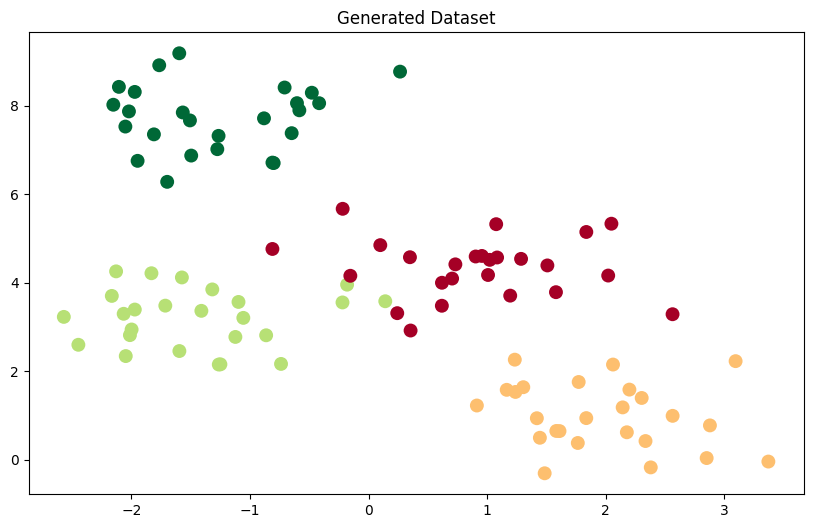

Step [0/20000], Loss: 1.7991
Step [1000/20000], Loss: 0.2546
Step [2000/20000], Loss: 0.1695
Step [3000/20000], Loss: 0.1352
Step [4000/20000], Loss: 0.1153
Step [5000/20000], Loss: 0.1023
Step [6000/20000], Loss: 0.0930
Step [7000/20000], Loss: 0.0862
Step [8000/20000], Loss: 0.0811
Step [9000/20000], Loss: 0.0771
Step [10000/20000], Loss: 0.0739
Step [11000/20000], Loss: 0.0712
Step [12000/20000], Loss: 0.0690
Step [13000/20000], Loss: 0.0671
Step [14000/20000], Loss: 0.0655
Step [15000/20000], Loss: 0.0641
Step [16000/20000], Loss: 0.0629
Step [17000/20000], Loss: 0.0618
Step [18000/20000], Loss: 0.0609
Step [19000/20000], Loss: 0.0601
Accuracy: 97.00%


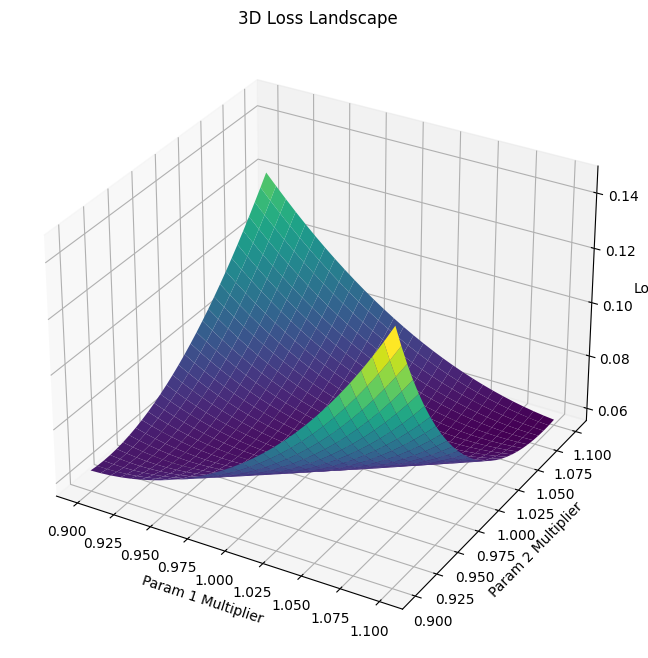

In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define the dataset creation function
def create_dataset(n_samples=200, n_features=2, n_classes=2, cluster_std=0.7):
    X, y = make_blobs(n_samples=n_samples, cluster_std=cluster_std, centers=n_classes, n_features=n_features, random_state=0)
    return torch.from_numpy(X).float(), torch.from_numpy(y).long()

# Define the Net class with a hidden layer
class Net(nn.Module):
    def __init__(self, n_feature: int, n_hidden: int, n_output: int):
        super(Net, self).__init__()
        self.hidden = nn.Linear(n_feature, n_hidden)
        self.out = nn.Linear(n_hidden, n_output)

    def forward(self, x: torch.Tensor):
        x = torch.relu(self.hidden(x))
        x = self.out(x)
        return x

# Parameters
n_samples = 100
n_features = 2
n_classes = 4

# Generate the dataset
x, y = create_dataset(n_samples=n_samples, n_features=n_features, n_classes=n_classes)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.title('Generated Dataset')
plt.show()

# Instantiate the model, loss function, and optimizer
net = Net(n_feature=n_features, n_hidden=10, n_output=n_classes)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# Number of training steps
num_steps = 20000

# List to store loss values for plotting
loss_values = []

# Training loop
for t in range(num_steps):
    # Compute predictions from our training set `x`
    prediction = net(x)

    # Calculate the loss
    loss = loss_func(prediction, y)

    # Store the loss value
    loss_values.append(loss.item())

    # Clear the gradients from the previous iteration
    optimizer.zero_grad()
    # Compute backpropagation to get the gradients
    loss.backward()
    # Perform one iteration of SGD
    optimizer.step()

    if t % 1000 == 0:
        print(f'Step [{t}/{num_steps}], Loss: {loss.item():.4f}')

# Compute accuracy
def compute_accuracy(model, x, y):
    model.eval()
    with torch.no_grad():
        prediction = model(x)
        predicted_labels = torch.argmax(prediction, dim=1)
        accuracy = (predicted_labels == y).sum().item() / len(y)
    return accuracy

accuracy = compute_accuracy(net, x, y)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Function to compute loss for given parameter values
def compute_loss_for_params(net, x, y, loss_func, param1_range, param2_range, param1_idx, param2_idx):
    loss_landscape = np.zeros((len(param1_range), len(param2_range)))

    # Convert parameters to a list to access them by index
    original_params = [p.clone() for p in net.parameters()]

    for i, param1_value in enumerate(param1_range):
        for j, param2_value in enumerate(param2_range):
            # Perturb the model parameters
            perturbed_params = [p.clone() for p in original_params]
            perturbed_params[param1_idx].data *= param1_value
            perturbed_params[param2_idx].data *= param2_value

            # Assign the perturbed parameters to the model
            with torch.no_grad():
                for param, perturbed_param in zip(net.parameters(), perturbed_params):
                    param.copy_(perturbed_param)

            # Compute the loss
            prediction = net(x)
            loss = loss_func(prediction, y)
            loss_landscape[i, j] = loss.item()

    # Restore original parameters
    with torch.no_grad():
        for param, original_param in zip(net.parameters(), original_params):
            param.copy_(original_param)

    return loss_landscape

param1_range = np.linspace(0.9, 1.1, 30)
param2_range = np.linspace(0.9, 1.1, 30)

# Choose parameter indices to perturb (e.g., weights of the first and second layers)
param1_idx = 0
param2_idx = 1

loss_landscape = compute_loss_for_params(net, x, y, loss_func, param1_range, param2_range, param1_idx, param2_idx)

# Plotting the 3D loss landscape
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(param1_range, param2_range)
Z = loss_landscape

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Param 1 Multiplier')
ax.set_ylabel('Param 2 Multiplier')
ax.set_zlabel('Loss')
ax.set_title('3D Loss Landscape')
plt.show()


Bring Your Own Dataset!

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()


In [14]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first few rows of the dataset
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [16]:
# Display the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

# Generate basic statistics
print(df.describe())

Shape of the dataset: (150, 5)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [17]:
X = iris.data
y = iris.target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)


In [18]:
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = IrisNet()


In [22]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.0351
Epoch [200/1000], Loss: 0.0330
Epoch [300/1000], Loss: 0.0249
Epoch [400/1000], Loss: 0.0175
Epoch [500/1000], Loss: 0.0112
Epoch [600/1000], Loss: 0.0068
Epoch [700/1000], Loss: 0.0041
Epoch [800/1000], Loss: 0.0027
Epoch [900/1000], Loss: 0.0018
Epoch [1000/1000], Loss: 0.0013


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


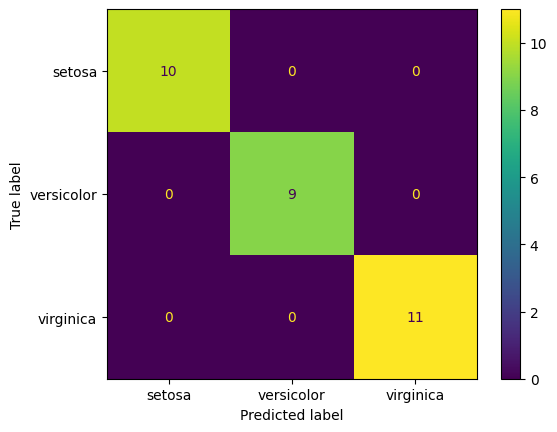

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)

# Convert predictions and targets to numpy arrays
y_pred = predicted.numpy()
y_true = y_test.numpy()

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.show()


Epoch [10/100], Train Loss: 0.0013, Test Loss: 0.0000
Epoch [20/100], Train Loss: 0.0012, Test Loss: 0.0001
Epoch [30/100], Train Loss: 0.0012, Test Loss: 0.0001
Epoch [40/100], Train Loss: 0.0011, Test Loss: 0.0001
Epoch [50/100], Train Loss: 0.0010, Test Loss: 0.0001
Epoch [60/100], Train Loss: 0.0010, Test Loss: 0.0001
Epoch [70/100], Train Loss: 0.0009, Test Loss: 0.0001
Epoch [80/100], Train Loss: 0.0009, Test Loss: 0.0001
Epoch [90/100], Train Loss: 0.0008, Test Loss: 0.0001
Epoch [100/100], Train Loss: 0.0008, Test Loss: 0.0001


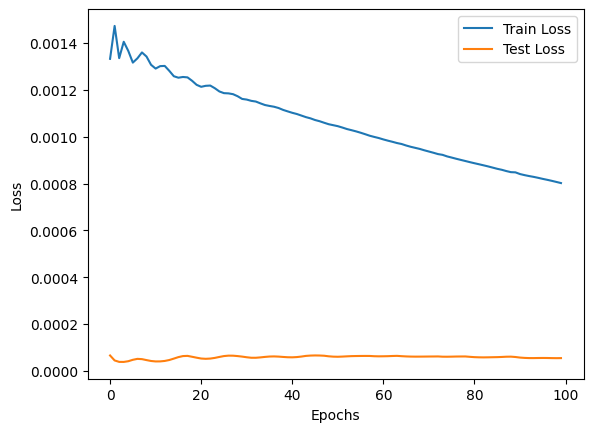

In [24]:
from sklearn.metrics import accuracy_score

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Plot loss values
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## update the model by Performing hyperparameter search to find the best learning rate

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import ParameterGrid

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first few rows of the dataset
print(df.head())

# Display the shape of the dataset
print(f"Shape of the dataset: {df.shape}")

# Generate basic statistics
print(df.describe())






   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Shape of the dataset: (150, 5)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000        

Epoch [100/1000], Train Loss: 0.6649, Test Loss: 0.6110
Epoch [200/1000], Train Loss: 0.2324, Test Loss: 0.1856
Epoch [300/1000], Train Loss: 0.0976, Test Loss: 0.0731
Epoch [400/1000], Train Loss: 0.0645, Test Loss: 0.0462
Epoch [500/1000], Train Loss: 0.0515, Test Loss: 0.0364
Epoch [600/1000], Train Loss: 0.0453, Test Loss: 0.0304
Epoch [700/1000], Train Loss: 0.0417, Test Loss: 0.0256
Epoch [800/1000], Train Loss: 0.0391, Test Loss: 0.0222
Epoch [900/1000], Train Loss: 0.0368, Test Loss: 0.0198
Epoch [1000/1000], Train Loss: 0.0344, Test Loss: 0.0184


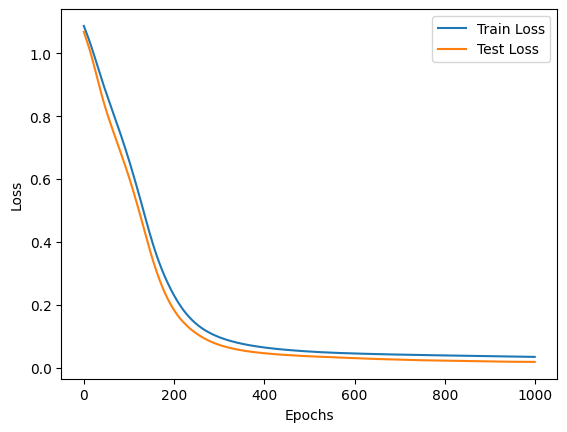

Best parameters: {'hidden_size': 8, 'lr': 0.01}
Best accuracy: 1.0000


In [30]:
# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df.drop('target', axis=1))

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, df['target'], test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Define the neural network model
class IrisNet(nn.Module):
    def __init__(self, input_size=4, hidden_size=16, output_size=3):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = IrisNet()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Evaluate on test data
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Plot loss values
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Hyperparameter search
def train_evaluate(params):
    model = IrisNet(hidden_size=params['hidden_size'])
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=params['lr'])

    # Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted = torch.max(test_outputs.data, 1)
        accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

    return accuracy

# Define the parameter grid
param_grid = {
    'hidden_size': [8, 16, 32],
    'lr': [0.01, 0.001, 0.0001]
}

# Perform grid search
best_accuracy = 0
best_params = None
for params in ParameterGrid(param_grid):
    accuracy = train_evaluate(params)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print(f'Best parameters: {best_params}')
print(f'Best accuracy: {best_accuracy:.4f}')
